In [1]:
import numpy as np
import matplotlib.pyplot as plt

# M-N kesit diyagramı

## boyutlar

In [2]:
a=400 #mm, yükseklik
b=300 #mm, genişlik
c=50 #mm, pas payı
d=a-c
As1=1017 #mm^2, 4Q18, alt donatı alanı
As2=452 #mm^2, 4Q12, üst donatı alanı 

## Malzemeler

In [3]:
#betonarme 
fck=25 #MPa
gamma_c=1.5
fcd=0.85*fck/gamma_c #MPa
eps_cc=-0.0020
eps_cu=-0.0035

#donatı
fyk=450 #MPa
gamma_s=1.15
fyd=fyk/gamma_s #MPa
Es=200000 #MPa
eps_su=0.01
eps_y=fyd/Es

## Gerilme-şekil değiştirme 
### Beton:

In [4]:
def rel_c(eps):
    n=len(eps)
    sig=np.zeros(n)
    for i in range(n):
        if eps[i]>=0:
            sig[i]=0
        elif 0>eps[i] and eps[i]>=eps_cc:
            sig[i]=-fcd*(2-eps[i]/eps_cc)*eps[i]/eps_cc
        elif eps_cc>eps[i] and eps[i]>=eps_cu:
            sig[i]=-fcd
        else:
            print('invalid eps value')
    return(sig)

### Donatı:

In [5]:
def rel_s(eps):
    n=len(eps)
    sig=np.zeros(n)
    for i in range(n):
        if -eps_su<=eps[i] and eps[i]<=-eps_y:
            sig[i]=-fyd
        elif -eps_y<eps[i] and eps[i]<=eps_y:
            sig[i]=eps[i]*Es
        elif eps_y<eps[i] and eps[i]<=eps_su:
            sig[i]=fyd
        else:
            print('invalid eps value')
    return(sig)

## M1-N1

In [6]:
n_step=20

yn_sup=-9999
yn_inf=0
yn=np.linspace(yn_sup, yn_inf, n_step)
psi=eps_su/(d-yn)
eps_s1=np.full(n_step, eps_su)
eps_s2=-psi*(yn-c)
sig_s1=rel_s(eps_s1)
sig_s2=rel_s(eps_s2)

Nrd_1=As1*sig_s1+As2*sig_s2
Mrd_1=As1*sig_s1*(a/2-c)-As2*sig_s2*(a/2-c)

## M2-N2

In [7]:
yn_sup=0
yn_inf=-d*eps_cu/(eps_su-eps_cu)
yn=np.linspace(yn_sup, yn_inf, n_step)
psi=eps_su/(d-yn)
eps_s1=np.full(n_step, eps_su)
eps_s2=-psi*(yn-c)
sig_s1=rel_s(eps_s1)
sig_s2=rel_s(eps_s2)

Nc=np.zeros(n_step)
Mc=np.zeros(n_step)
for i in range(n_step):
    y=np.linspace(0, yn[i], 10)
    eps_c=-(yn[i]-y)*psi[i]
    eps_c=np.round(eps_c, 7)
    sig_c=rel_c(eps_c)
    Nc[i]=b*np.trapz(sig_c, y)
    ygc=np.nan_to_num(np.trapz(sig_c*y, y)/np.trapz(sig_c, y))
    Mc[i]=Nc[i]*(a/2-ygc)

Nrd_2=Nc+As1*sig_s1+As2*sig_s2
Mrd_2=-Mc+As1*sig_s1*(a/2-c)-As2*sig_s2*(a/2-c)

C:\Users\cagda\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


## M3-N3

In [8]:
yn_sup=-d*eps_cu/(eps_su-eps_cu)
yn_inf=-d*eps_cu/(eps_y-eps_cu)
yn=np.linspace(yn_sup, yn_inf, n_step)
psi=-eps_cu/yn
eps_s1=-psi*(yn-d)
eps_s2=-psi*(yn-c)
eps_s1=np.round(eps_s1, 5)
eps_s2=np.round(eps_s2, 5)
sig_s1=rel_s(eps_s1)
sig_s2=rel_s(eps_s2)

Nc=np.zeros(n_step)
Mc=np.zeros(n_step)
for i in range(n_step):
    y=np.linspace(0, yn[i], 10)
    eps_c=-(yn[i]-y)*psi[i]
    eps_c=np.round(eps_c, 7)
    sig_c=rel_c(eps_c)
    Nc[i]=b*np.trapz(sig_c, y)
    ygc=np.trapz(sig_c*y, y)/np.trapz(sig_c, y)
    Mc[i]=Nc[i]*(a/2-ygc)
    
Nrd_3=Nc+As1*sig_s1+As2*sig_s2
Mrd_3=-Mc+As1*sig_s1*(a/2-c)-As2*sig_s2*(a/2-c)

## M4-N4

In [9]:
yn_sup=-d*eps_cu/(eps_y-eps_cu)
yn_inf=a
yn=np.linspace(yn_sup, yn_inf, n_step)
psi=-eps_cu/yn
eps_s1=-psi*(yn-d)
eps_s2=-psi*(yn-c)
sig_s1=rel_s(eps_s1)
sig_s2=rel_s(eps_s2)

Nc=np.zeros(n_step)
Mc=np.zeros(n_step)
for i in range(n_step):
    y=np.linspace(0, yn[i], 10)
    eps_c=-(yn[i]-y)*psi[i]
    eps_c=np.round(eps_c, 7)
    sig_c=rel_c(eps_c)
    Nc[i]=b*np.trapz(sig_c, y)
    ygc=np.trapz(sig_c*y, y)/np.trapz(sig_c, y)
    Mc[i]=Nc[i]*(a/2-ygc)
    
Nrd_4=Nc+As1*sig_s1+As2*sig_s2
Mrd_4=-Mc+As1*sig_s1*(a/2-c)-As2*sig_s2*(a/2-c)

## M5-N5

In [10]:
yn_sup=a
yn_inf=a+9999
yn=np.linspace(yn_sup, yn_inf, n_step)
t=3/7*a
psi=-eps_cc/(yn-t)
eps_s1=-psi*(yn-d)
eps_s2=-psi*(yn-c)
sig_s1=rel_s(eps_s1)
sig_s2=rel_s(eps_s2)

Nc=np.zeros(n_step)
Mc=np.zeros(n_step)
for i in range(n_step):
    y=np.linspace(0, a, 10)
    eps_c=-(yn[i]-y)*psi[i]
    eps_c=np.round(eps_c, 7)
    sig_c=rel_c(eps_c)
    Nc[i]=b*np.trapz(sig_c, y)
    ygc=np.trapz(sig_c*y, y)/np.trapz(sig_c, y)
    Mc[i]=Nc[i]*(a/2-ygc)
    
Nrd_5=Nc+As1*sig_s1+As2*sig_s2
Mrd_5=-Mc+As1*sig_s1*(a/2-c)-As2*sig_s2*(a/2-c)

Text(0, 0.5, 'M [KNm]')

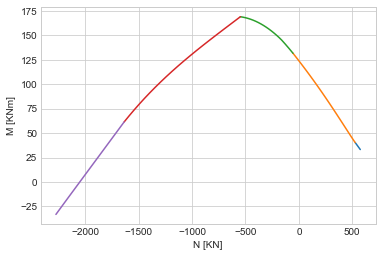

In [11]:
plt.style.use("seaborn-whitegrid")
fig, ax=plt.subplots(figsize=(6,4))
ax.plot(Nrd_1*1E-3, Mrd_1*1E-6)
ax.plot(Nrd_2*1E-3, Mrd_2*1E-6)
ax.plot(Nrd_3*1E-3, Mrd_3*1E-6)
ax.plot(Nrd_4*1E-3, Mrd_4*1E-6)
ax.plot(Nrd_5*1E-3, Mrd_5*1E-6)
ax.set_xlabel("N [KN]")
ax.set_ylabel("M [KNm]")

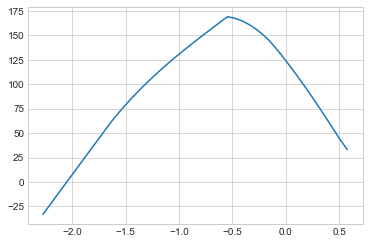

In [12]:
Mrd=np.hstack((Mrd_1*1E-6,Mrd_2*1E-6, Mrd_3*1E-6,
               Mrd_4*1E-6, Mrd_5*1E-6))
Nrd=np.hstack((Nrd_1*1E-6,Nrd_2*1E-6, Nrd_3*1E-6,
               Nrd_4*1E-6, Nrd_5*1E-6))
fig, ax=plt.subplots(figsize=(6,4))
ax.plot(Nrd, Mrd)
